卡尔曼滤波 初始化

In [1]:
import numpy as np
import matplotlib.pyplot as plt

delta_t = 0.1                               # 每秒钟采一次样
end_t = 7                                   # 时间长度
time_t = end_t * 10                         # 采样次数
t = np.arange(0, end_t, delta_t)            # 设置时间数组

u = 1                                       # 定义外界对系统的作用 加速度
x = 1 / 2 * u * t ** 2                      # 实际真实位置

v_var = 1                                   # 测量噪声的方差
# 创建高斯噪声，精确到小数点后两位
v_noise = np.round(np.random.normal(0, v_var, time_t), 2)

X = np.mat([[0], [0]])                      # 定义预测优化值的初始状态
v = np.mat(v_noise)                         # 定义测量噪声
z = x + v                                   # 定义测量值（假设测量值=实际状态值+噪声）
A = np.mat([[1, delta_t], [0, 1]])          # 定义状态转移矩阵
B = [[1 / 2 * (delta_t ** 2)], [delta_t]]   # 定义输入控制矩阵
P = np.mat([[1, 0], [0, 1]])                # 定义初始状态协方差矩阵
Q = np.mat([[0.001, 0], [0, 0.001]])        # 定义状态转移(预测噪声)协方差矩阵
H = np.mat([1, 0])                          # 定义观测矩阵
R = np.mat([1])                             # 定义观测噪声协方差
X_mat = np.zeros(time_t)                    # 初始化记录系统预测优化值的列表

迭代运算

In [2]:
for i in range(time_t):
    # 预测
    X_predict = A * X + np.dot(B, u)        # 估算状态变量
    P_predict = A * P * A.T + Q             # 估算状态误差协方差
    # 校正
    K = P_predict * H.T / (H * P_predict * H.T + R)     # 更新卡尔曼增益
    X = X_predict + K * (z[0, i] - H * X_predict)       # 更新预测优化值
    P = (np.eye(2) - K * H) * P_predict                 # 更新状态误差协方差
    # 记录系统的预测优化值
    X_mat[i] = X[0, 0]

图形显示

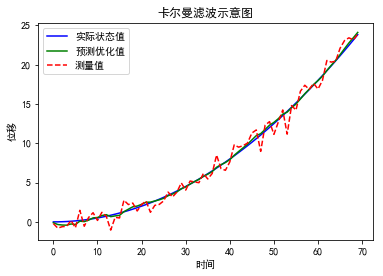

In [3]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']    # 设置正常显示中文
plt.plot(x, "b", label='实际状态值')            # 设置曲线数值
plt.plot(X_mat, "g", label='预测优化值')
plt.plot(z.T, "r--", label='测量值')
plt.xlabel("时间")                              # 设置X轴的名字
plt.ylabel("位移")                              # 设置Y轴的名字
plt.title("卡尔曼滤波示意图")                   # 设置标题
plt.legend()                                    # 设置图例
plt.show()                                      # 显示图表